In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G=nx.Graph()

In [3]:
G.add_node(1)

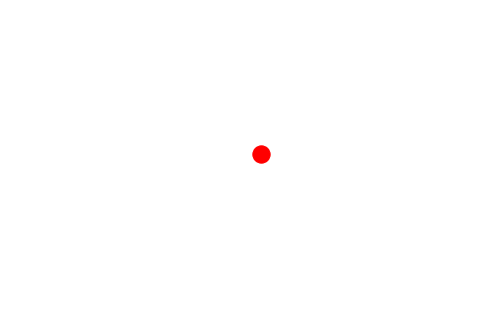

In [4]:
nx.draw(G)

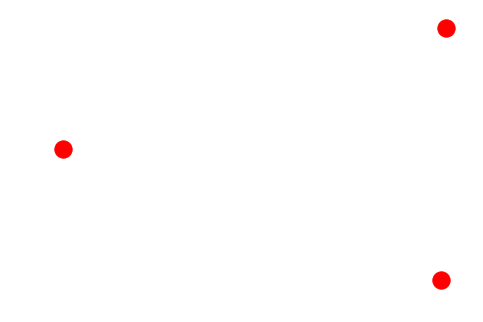

In [5]:
G.add_nodes_from([2,3])
nx.draw(G)

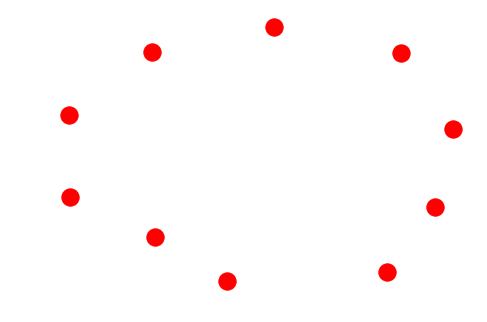

In [6]:
H=nx.path_graph(10)
G.add_nodes_from(H)
nx.draw(G)

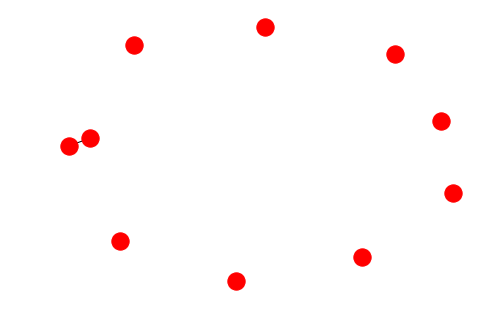

In [8]:
G.add_edge(1,2)
nx.draw(G)

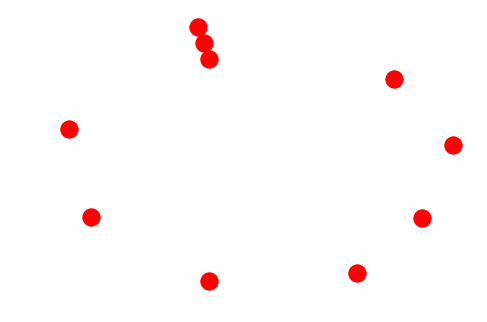

In [9]:
G.add_edges_from([(1,2),(1,3)])
nx.draw(G)

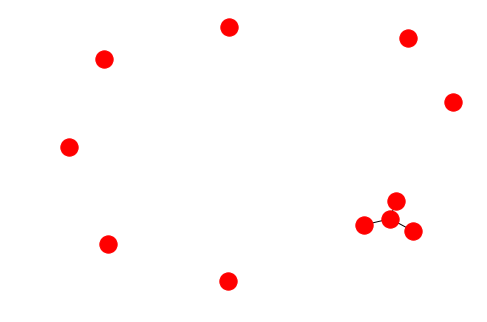

In [10]:
G.add_edge(1,'najib')
nx.draw(G)

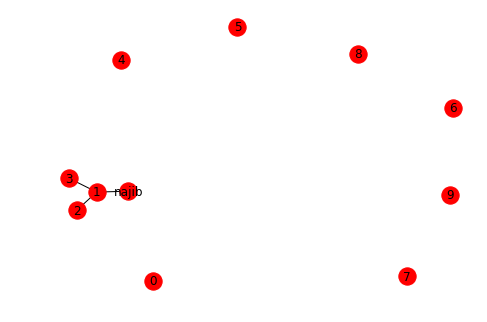

In [11]:
nx.draw(G,with_labels=1)

In [12]:
!wget https://gitlab.com/huseinzol05/Network-Analysis/raw/master/stack_network_nodes.csv

--2018-04-28 11:15:38--  https://gitlab.com/huseinzol05/Network-Analysis/raw/master/stack_network_nodes.csv
Resolving gitlab.com (gitlab.com)... 52.167.219.168
Connecting to gitlab.com (gitlab.com)|52.167.219.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1845 (1.8K) [text/plain]
Saving to: ‘stack_network_nodes.csv’

stack_network_nodes 100%[===================>]   1.80K  --.-KB/s    in 0s      

2018-04-28 11:15:39 (207 MB/s) - ‘stack_network_nodes.csv’ saved [1845/1845]



In [14]:
!wget https://gitlab.com/huseinzol05/Network-Analysis/raw/master/stack_network_links.csv

--2018-04-28 11:23:41--  https://gitlab.com/huseinzol05/Network-Analysis/raw/master/stack_network_links.csv
Resolving gitlab.com (gitlab.com)... 52.167.219.168
Connecting to gitlab.com (gitlab.com)|52.167.219.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16490 (16K) [text/plain]
Saving to: ‘stack_network_links.csv’

stack_network_links 100%[===================>]  16.10K  66.4KB/s    in 0.2s    

2018-04-28 11:23:43 (66.4 KB/s) - ‘stack_network_links.csv’ saved [16490/16490]



In [15]:
import pandas as pd

In [16]:
df_nodes = pd.read_csv('stack_network_nodes.csv')
df_nodes.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [17]:
df_links = pd.read_csv('stack_network_links.csv')
df_links.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [18]:
G = nx.Graph()

In [19]:
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], 
               group=row['group'], 
               nodesize=row['nodesize'])

In [20]:
for index, row in df_links.iterrows():
    G.add_weighted_edges_from([(row['source'], 
                                row['target'], 
                                row['value'])])

In [22]:
df_nodes.group.unique()

array([ 6,  8,  3,  4,  1,  2, 10,  5, 14,  7, 12, 11,  9, 13])

In [23]:
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0',
             4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7',
             10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

In [25]:
options = {
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

In [26]:
colors = []
for node in G:
    colors.append(color_map[G.node[node]['group']])
# colors = [color_map[G.node[node]['group']] for node in G]

In [28]:
sizes = []
for node in G:
    sizes.append(G.node[node]['nodesize']*10)
# sizes = [G.node[node]['nodesize']*10 for node in G]

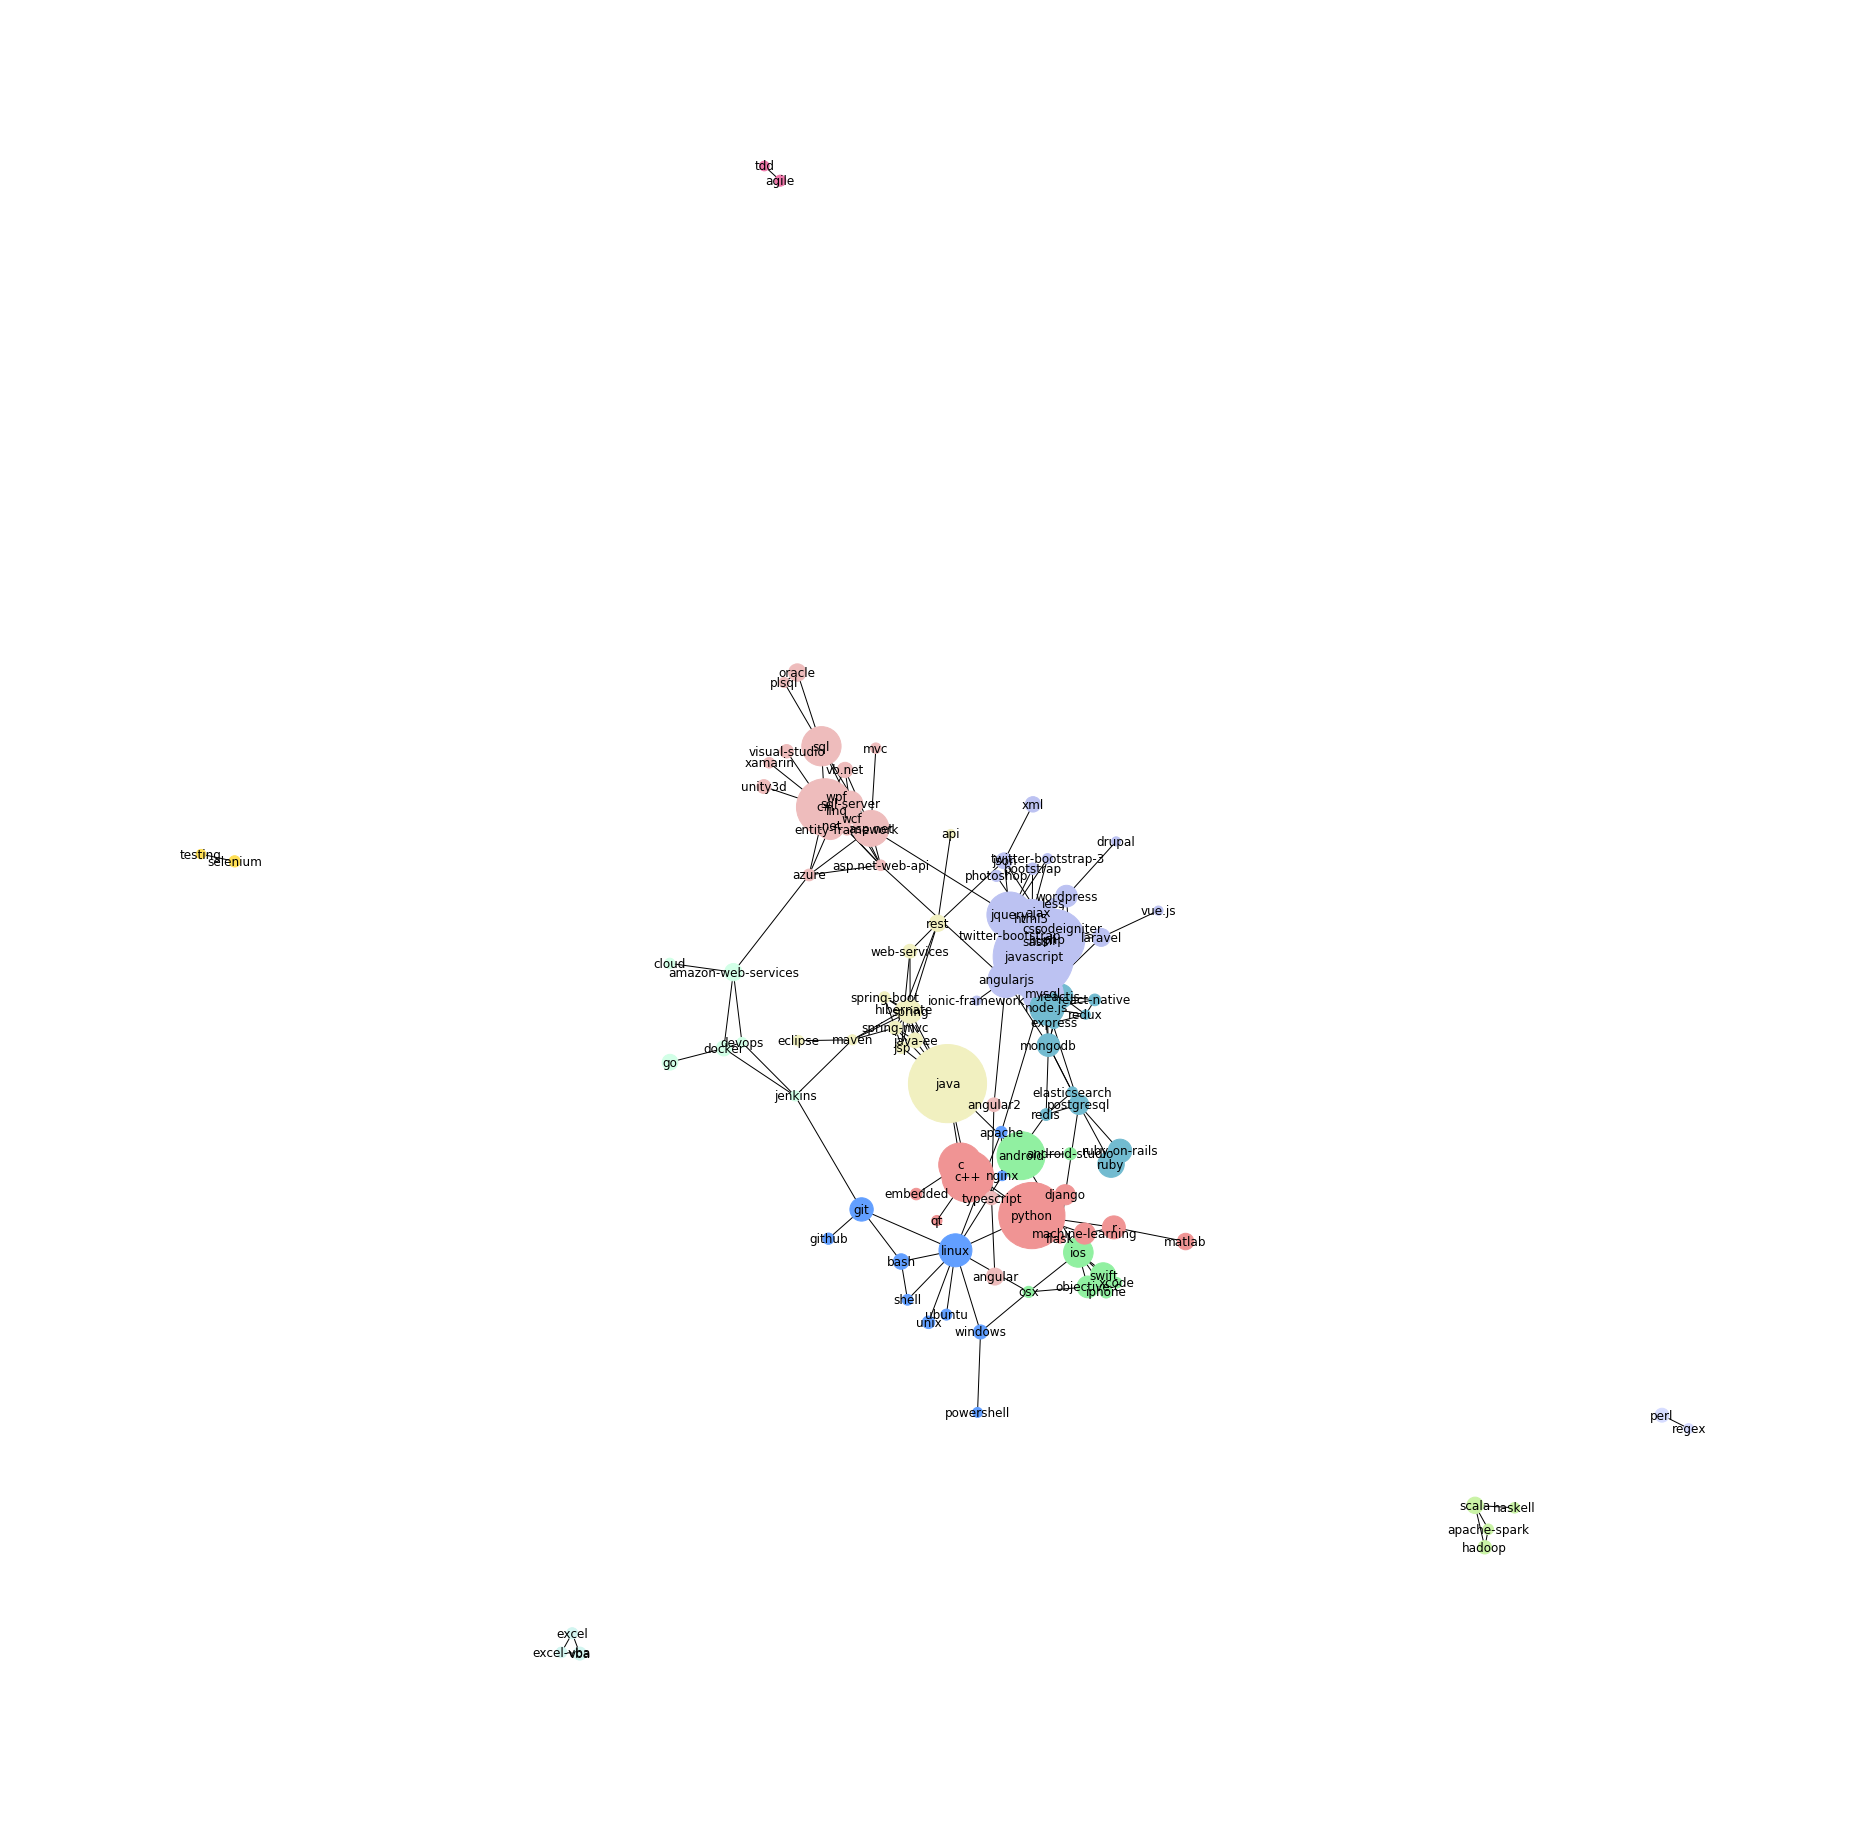

In [33]:
plt.figure(figsize=(25,25))
nx.draw(G,node_color=colors,node_size=sizes,
        pos=nx.spring_layout(G, k=0.25, iterations=50),**options)